In [103]:
%matplotlib inline

import os, subprocess, cftime
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import xesmf as xe
import pandas as pd

# Read in observations

#### P18

In [104]:
# DOC data from Repeat Hydrography lines
p18 = pd.read_csv('data/transects/P18_33RO20071215.exc.csv', skiprows=52)
p18 = p18[['LATITUDE','LONGITUDE']].dropna().drop_duplicates()
p18

,LATITUDE,LONGITUDE
1,24.4593,-112.9065
25,22.8672,-110.0007
38,22.7990,-110.0015
52,22.6998,-110.0000
76,22.4998,-110.0002
...,...,...
5608,-68.3328,-102.8260
5632,-68.9090,-102.5413
5656,-69.4407,-103.4098
5680,-67.0005,-107.2502


In [105]:
# get range
print('P18 LATITUDE: ',np.min(p18.LATITUDE), np.max(p18.LATITUDE))
print('P18 LONGITUDE: ', np.min(p18.LONGITUDE), np.max(p18.LONGITUDE))

P18 LATITUDE:  -69.4407 24.4593
P18 LONGITUDE:  -112.9065 -102.5413


#### P16N

In [106]:
p16n = pd.read_csv('data/transects/P16N_325020060213.exc.csv', skiprows=34)
p16n = p16n[['LATITUDE','LONGITUDE']].dropna().drop_duplicates()
p16n

,LATITUDE,LONGITUDE
1,-17.0002,-149.9995
35,-16.0000,-150.0000
69,-15.0000,-150.8000
103,-14.0002,-151.0000
137,-12.9998,-150.9985
...,...,...
2759,55.8502,-153.0302
2795,55.9197,-153.0598
2828,56.0100,-153.0997
2854,56.2198,-153.1897


In [107]:
# get range
print('P16N LATITUDE: ',np.min(p16n.LATITUDE), np.max(p16n.LATITUDE))
print('P16N LONGITUDE: ', np.min(p16n.LONGITUDE), np.max(p16n.LONGITUDE))

P16N LATITUDE:  -17.0002 56.2802
P16N LONGITUDE:  -153.2202 -149.9995


#### P16S

In [108]:
p16s = pd.read_csv('data/transects/P16S_33RR20050109.exc.csv', skiprows=30)
p16s = p16s[['LATITUDE','LONGITUDE']].dropna().drop_duplicates()
p16s

,LATITUDE,LONGITUDE
1,-16.0000,-149.9925
37,-16.5000,-150.0000
73,-16.9995,-150.0003
109,-17.4998,-150.2452
145,-18.0000,-150.0000
...,...,...
3699,-69.0008,-149.9938
3731,-69.4998,-150.0010
3762,-70.0002,-150.0003
3794,-70.5002,-150.0008


In [109]:
# get range
print('P16S LATITUDE: ',np.min(p16s.LATITUDE), np.max(p16s.LATITUDE))
print('P16S LONGITUDE: ', np.min(p16s.LONGITUDE), np.max(p16s.LONGITUDE))

P16S LATITUDE:  -70.9995 -16.0
P16S LONGITUDE:  -150.2452 -149.908


In [110]:
p16 = p16s.append(p16n)

In [111]:
# get range
print('P16 LATITUDE: ',np.min(p16.LATITUDE), np.max(p16.LATITUDE))
print('P16 LONGITUDE: ', np.min(p16.LONGITUDE), np.max(p16.LONGITUDE))

P16 LATITUDE:  -70.9995 56.2802
P16 LONGITUDE:  -153.2202 -149.908


# Read in model grid


In [112]:
grid = xr.open_dataset('/work/jyl/tmp/ocean_static.nc')

In [113]:
grid.sel(xh=-100, method='nearest')

<xarray.Dataset>
Dimensions:       (time: 1, xq: 720, yh: 576, yq: 576)
Coordinates:
    xh            float64 -99.75
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time          (time) object 1948-01-01 00:00:00
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
Data variables: (12/27)
    areacello     (yh) float32 ...
    deptho        (yh) float32 ...
    hfgeou        (yh) float32 ...
    sftof         (yh) float32 ...
    Coriolis      (yq, xq) float32 ...
    geolon        (yh) float32 ...
    ...            ...
    dxCv          (yq) float32 ...
    dyCv          (yq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq) float32 ...
    areacello_bu  (yq, xq) float32 ...
    basin         (yh) int32 ...
Attributes:
    filename:   19480101.ocean_static.nc
    title:      OMp5_IAF_BLING_baseline
    grid_type:  regular
    grid_tile:  N/A

In [114]:
#gridsel_P18 = grid.sel(xh=p18.LONGITUDE, yh=p18.LATITUDE, method='nearest')
gridsel_P16 = grid.sel(xh=p16.LONGITUDE, yh=p16.LATITUDE, method='nearest')

#### Because the original data jump across different longitudes, then we are now going to create a new data frame w/ a fixed longitude.

In [115]:
p18_fix = p18
p18_fix['LONGITUDE'] = np.repeat(-110,len(p18))

p16_fix = p16
p16_fix['LONGITUDE'] = np.repeat(-151,len(p16))

In [116]:
gridsel_P18 = grid.sel(xh=p18_fix.LONGITUDE, yh=p18_fix.LATITUDE, method='nearest')
gridsel_P16 = grid.sel(xh=p16_fix.LONGITUDE, yh=p16_fix.LATITUDE, method='nearest')

/net/Jessica.Luo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


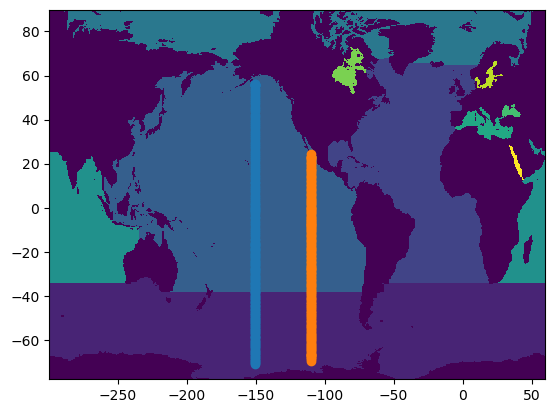

In [117]:
plt.pcolormesh(grid.xh, grid.yh, grid.basin)
plt.scatter(gridsel_P16.xh, gridsel_P16.yh)
plt.scatter(gridsel_P18.xh, gridsel_P18.yh)

### save files

In [118]:
p18_fix.to_csv('data/transects/P18_fixed.csv', index=False, mode='w')
p16_fix.to_csv('data/transects/P16_fixed.csv', index=False, mode='w')